# EXPLICABILIDAD ALGORÍTIMICA

REFERENCIAS:
- https://slundberg.github.io/shap/notebooks/Census%20income%20classification%20with%20scikit-learn.html
- https://shap.readthedocs.io/en/latest/index.html
- https://www.statisticshowto.com/log-odds/

## Dataset

**Adult Dataset** (https://archive.ics.uci.edu/ml/datasets/Adult). 

La extracción fue realizada por Barry Becker de la base de datos del censo de EEUU 1994. 
El objetivo de este dataset es determinar **si una persona gana más de 50K$ al año** usando la información demográfica.

Each entry contains the following information
about an individual:
- **age**: the age of an individual. *Integer greater than 0.*
- **workclass**: a general term to represent the employment status of an individual. *Private, Self emp not inc, Self emp inc, Federal gov, Local gov, State gov, Without pay, Never worked.*
- **fnlwgt**: final weight. In other words, this is the number of people the census believes the entry represents. *Integer greater than 0.*
- **education**: the highest level of education achieved by an individual. *Bachelors, Some college, 11th, HS grad, Prof school, Assoc acdm, Assoc voc, 9th, 7th 8th, 12th, Masters, 1st 4th, 10th, Doctorate, 5th 6th, Preschool.*
- **education num**: the highest level of education achieved in numerical form.*Integer greater than 0*
- **marital status**: marital status of an individual. *Married civ spouse corresponds to a civilian spouse while Married AF spouse is a spouse in the Armed Forces. Married civ spouse, Divorced, Never married, Separated, Widowed, Married spouse absent, Married AF spouse.*
- **occupation**: the general type of occupation of an individual. *Tech support, Craft repair, Other service, Sales, Exec managerial, Prof specialty, Handlers cleaners, Machine op inspct, Adm clerical, Farming fishing, Transport moving, Priv house serv, Protective serv, Armed Forces.*
- **relationship**: represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all. *Wife, Own child, Husband, Not in family, Other relative, Unmarried.
- **race**: Descriptions of an individual’s race. *White, Asian Pac Islander, Amer Indian Eskimo, Other, Black.
- **sex: the biological sex of the individual. *Male, Female.*
- **capital gain**: capital gains for an individual. *Integer greater than or equal to 0.*
- **capital loss**: capital loss for an individual. *Integer greater than or equal to 0.*
- **hours per week**: the hours an individual has reported to work per week. *Continuous.*
- **native country**: country of origin for an individual.

- **target**: whether or not an individual makes more than $50,000 annually.
○ <=50k, >50k

## SHAP

In [1]:
import shap
shap.initjs()

X,y = shap.datasets.adult() # datos limpios -> todas las variabes numéricas
X_display,y_display = shap.datasets.adult(display=True) # datos originales

In [2]:
X_display

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States
32557,40.0,Private,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States
32558,58.0,Private,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States
32559,22.0,Private,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States


In [3]:
X

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39
32557,40.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
32558,58.0,4,9.0,6,1,1,4,0,0.0,0.0,40.0,39
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39


Creamos los conjuntos de entrenamiento y test.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, X_display_train, X_display_test = train_test_split(X, y, X_display, test_size=0.2, random_state=7)

## Extreme Gradient Boosting Model

Vamos a obtener explicaciones de un modelo de tipo Extreme Gradient Boosting mediante SHAP.

En primer lugar, entrenamos nuestro modelo:

In [5]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=123)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...)

## Explainer

Vamos a utilizar la clase **Explainer** de la librería SHAP para conseguir las explicaciones que queremos de nuestro modelo recién entrenado:

In [6]:
explainer = shap.Explainer(xgb, X_test, model_output='probability')

In [7]:
# explainer_probs = shap.Explainer(xgb, X_test)

Con este objeto **explainer** podemos conseguir explicaciones tanto locales como globales, a la vez que representaciones de la información muy distintas.

----------------------------------------------------------------------------------------------------
### EXPLICACIÓN

- **Probability** is the probability an event happens. For example, there might be an 80% chance of rain today.

- **Odds** (more technically the odds of success) is defined as probability of success/probability of failure. So the odds of a success (80% chance of rain) has an accompanying odds of failure (20% chance it doesn’t rain); as an equation (the “odds ratio“), that’s .8/.2 = 4.

- **Log odds** is the logarithm of the odds. Ln(4) = 1.38629436 ≅ 1.386.

- The **odds ratio** is the probability of success/probability of failure. As an equation, that’s P(A)/P(-A), where P(A) is the probability of A, and P(-A) the probability of ‘not A’ (i.e. the complement of A).

Taking the **logarithm of the odds** ratio gives us the log odds of A, which can be written as

$log(A) = log(P(A)/P(-A))$,

Since the probability of an event happening, P(-A) is equal to the probability of an event not happening, 1 – P(A), we can write the log odds as

$log [p/(1-p)]$

Where:
- $p$ = the probability of an event happening
- $1 – p$ = the probability of an event not happening

When a function’s variable represents a probability, $p$ (as in the function above), it’s called the **logit function**.

----------------------------------------------------------------------------------------------------


### Valores de SHAP para cada dato de un conjunto:

In [8]:
shap_values = explainer(X_test)
shap_values

 96%|=================== | 6283/6513 [00:16<00:00]       

.values =
array([[ 8.52508376e-03,  2.95137793e-03, -2.33887443e-02, ...,
        -2.13321964e-02, -1.40060913e-02,  1.24898124e-04],
       [ 1.39969774e-01,  5.94879553e-02,  1.15599700e-01, ...,
         7.54877620e-03,  1.11277554e-01,  9.80301937e-04],
       [-1.36665847e-01, -6.84675985e-03, -1.26773823e-02, ...,
        -3.80710907e-03, -1.92070994e-02,  2.61803383e-04],
       ...,
       [-1.03975178e-01, -7.42269410e-05, -2.05828333e-03, ...,
        -1.80568638e-03, -3.66285808e-02, -2.16710600e-04],
       [-4.91130130e-02, -7.89835006e-03, -2.69208168e-02, ...,
        -2.43305331e-03, -7.67250030e-03, -1.62405694e-02],
       [ 1.08517446e-01, -6.68415019e-03,  2.20398167e-02, ...,
         1.97379721e-03, -3.59565724e-03,  3.28229330e-03]])

.base_values =
array([0.25324063, 0.25324063, 0.25324063, ..., 0.25324063, 0.25324063,
       0.25324063])

.data =
array([[ 39.,   4.,  10., ..., 625.,  40.,  39.],
       [ 48.,   1.,  13., ...,   0.,  58.,  39.],
       [ 22.,   

In [10]:
X_test.iloc[10]

Age               33.0
Workclass          4.0
Education-Num     14.0
Marital Status     2.0
Occupation        10.0
Relationship       4.0
Race               4.0
Sex                1.0
Capital Gain       0.0
Capital Loss       0.0
Hours per week    37.0
Country           39.0
Name: 8696, dtype: float64

In [11]:
X_display_test.iloc[10]

Age                              33.0
Workclass                     Private
Education-Num                    14.0
Marital Status     Married-civ-spouse
Occupation             Prof-specialty
Relationship                  Husband
Race                            White
Sex                              Male
Capital Gain                      0.0
Capital Loss                      0.0
Hours per week                   37.0
Country                 United-States
Name: 8696, dtype: object

In [12]:
shap_values[10, :]

.values =
array([-0.0025026 ,  0.00284094,  0.17386588,  0.05510777,  0.08191094,
        0.07602489,  0.00536686,  0.01379878, -0.01151734,  0.00433171,
       -0.0027321 ,  0.0025609 ])

.base_values =
0.2532406340641897

.data =
array([33.,  4., 14.,  2., 10.,  4.,  4.,  1.,  0.,  0., 37., 39.])

**INTERPRETACIÓN**

Por defecto la predicción del modelo es el valor medio de la variable objetivo para todos los datos.
Esta predicción predeterminada se ve afectada por cada uno de los valores que toman cada una de las variables de entrada, haciendo que ésta modifique su valor.
De los resultados que acabamos de obtener sobre los valores de SHAP, los valores positivos indican que la variable correspondiente aumenta la probabilidad de predecir la clase positiva, mientras que los valores negativos la reducen.

Podemos verlo de un modo mucho más claro con el siguiente gráfico:

In [13]:
explainer.expected_value

0.2532406340641897

In [15]:
shap.plots.force(shap_values[10])

In [16]:
shap.plots.force(shap_values[10], features = X_display_test.iloc[1,:])

- El *base value* es el valor por defecto predicho por el modelo (como si ninguna variable tuviera efecto).

- El valor que se muestra en negrita es la predicción realizada por el modelo después de considerar todas los valores de todas las variables. 

Esta representación es útil para entender por qué obtenemos un valor determinado en una predicción.

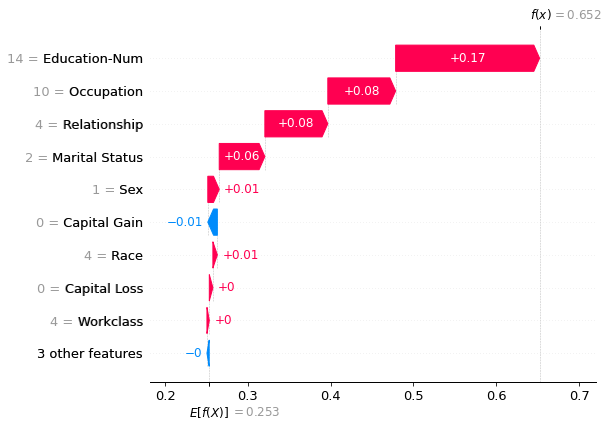

In [17]:
shap.plots.waterfall(shap_values[10]) #max_display=20

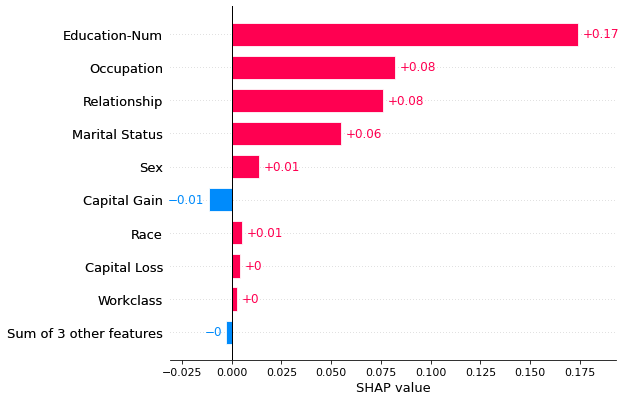

In [18]:
shap.plots.bar(shap_values[10])

### Summary plot

Si agrupamos todos los valores de SHAP por variable calculados y dibujamos un scatterplot podemos visualizar la importancia global de cada variable en el modelo:

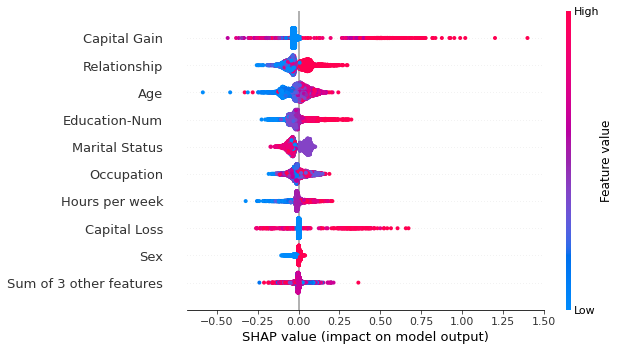

In [19]:
shap.plots.beeswarm(shap_values)

Los diagramas de decisión SHAP muestran cómo los modelos complejos llegan a sus predicciones (es decir, cómo los modelos toman decisiones).

## Gráficos de dependencia

Podemos obtener gráficos de dependencias parciales a través de los valores de SHAP. 

Por ejemplo, un gráfico de dependencia muestra cómo el número de años de educación aumenta la posibilidad de ganar más de 50K anualmente.

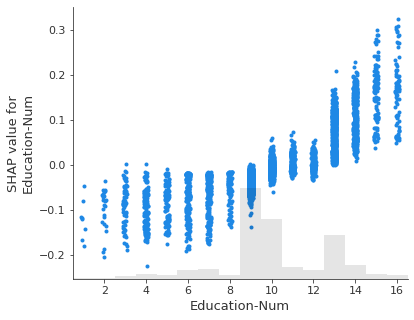

In [20]:
shap.plots.scatter(shap_values[:,"Education-Num"])

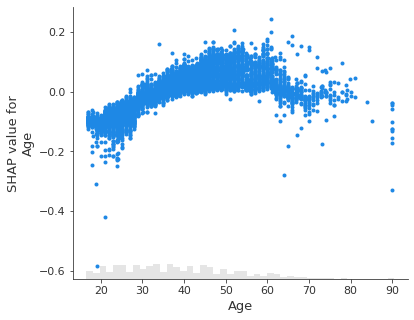

In [21]:
shap.plots.scatter(shap_values[:,"Age"])

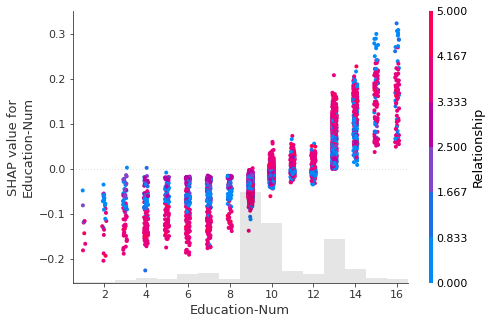

In [22]:
shap.plots.scatter(shap_values[:,"Education-Num"], color=shap_values)

Muestra un gráfico de dispersión con un punto para cada dato en el conjunto de test, representado por su *Education-Num* en el eje X y el valor SHAP correspondiente en el eje Y. 

Para que el gráfico sea más fácil de entender, SHAP selecciona automáticamente la mejor variable para colorear los puntos.

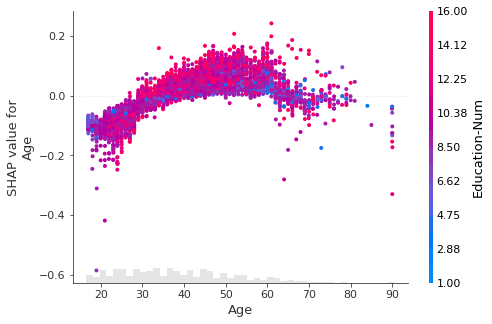

In [23]:
shap.plots.scatter(shap_values[:,"Age"], color=shap_values)